# Andrew Ingrassia
# Task 4.9 (Part 2)

***
### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [4]:
# Defines a file path for sake of convenience

path = r"C:\Users\ingra\OneDrive\Desktop\Career Foundry\(2) Data Analytics Immersion\Data Immersion - Section 4\Instacart Basket Analysis"

In [5]:
# Imports the 'instacart_df' dataframe and stores it in the variable 'df'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_df.pkl'))

In [6]:
# Sets the maximum number of columns to display to 'None' (no limit)

pd.set_option('display.max_columns', None)

### 1. Create a histogram of the 'order_hour_of_day' column and describe what it demonstrates

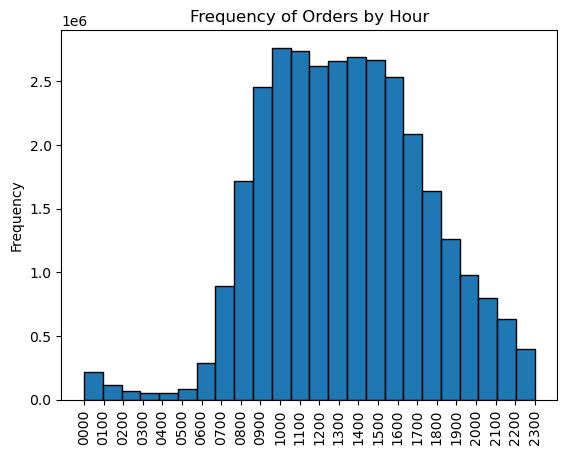

In [19]:
hist = df['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Orders by Hour')

# Get the current axes object
ax = hist.axes

# Set the x-tick labels to every hour vertically
ax.set_xticks(range(0, 24))
ax.set_xticklabels([f'{hour:02d}00' for hour in range(0, 24)], rotation='vertical')

plt.show()

- Peak hours are between ~9am and ~4pm

- Very little activity between midnight and ~6am

In [8]:
df.head(3)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_category,median_order_frequency,order_frequency,first_name,last_name,gender,state,age,date_joined,num_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Moderately busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


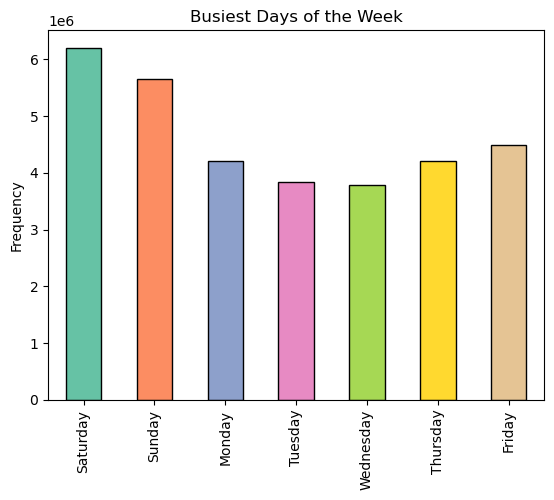

In [17]:
# Creates a dictionary to associate days of the week with numbers
day_dict = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Creates a bar chart demonstrating the busiest days of the week
day_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=sns.color_palette('Set2'), edgecolor='black')

# Get the current axes object
ax = day_bar.axes

# Set the x-tick labels using the day names from the dictionary
ax.set_xticklabels([day_dict.get(day, '') for day in range(7)])

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Busiest Days of the Week')

plt.show()

In [10]:
# Saves the histogram as a .png file

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_histogram.png'))

### 2. Create a bar chart from the 'loyalty_flag' column

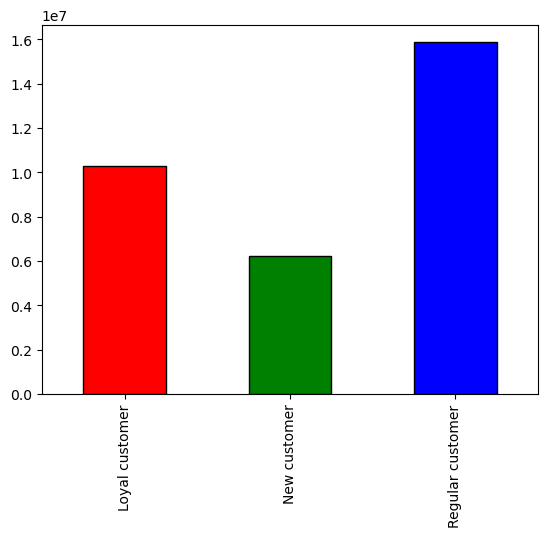

In [11]:
# Creates a bar chart from the 'loyalty_flag' column and assigns the result to the variable 'bar'

bar = df['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['red', 'green', 'blue'], edgecolor = 'black')

In [12]:
# Saves the bar chart as a .png file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_bar_chart.png'))

### 3. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [13]:
# Creates a random sample of the data

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
# Stores 70% of the dataframe in the variable 'big' and 30% in the variable 'small' (two samples)

big = df[dev]
small = df[~dev]

KeyboardInterrupt: 

In [ ]:
# Checks the length of the entire 'df' dataframe

len(df)

In [ ]:
# Checks of the sum of the lengths of the samples to see if they match the length of the entire 'df' dataframe

len(big) + len(small)

In [ ]:
# Creates a smaller dataframe from the 'small' sample

df_small = small[['order_hour_of_day', 'prices']]

In [ ]:
# Creates a smaller dataframe from the 'big' sample

df_big = big[['order_hour_of_day', 'prices']]

In [ ]:
# Creates a line chart from the 'df_small' dataframe

line_small = sns.lineplot(data = df_small, x = 'order_hour_of_day',y = 'prices')

In [ ]:
# Saves the line chart as a .png file

line_small.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_small.png'))

In [ ]:
# Creates a line chart from the 'df_big' dataframe

line_big = sns.lineplot(data = df_big, x = 'order_hour_of_day',y = 'prices')

In [ ]:
# Saves the line chart as a .png file

line_big.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_big.png'))

- The line charts from both samples indicate that there tends to be an uptick in expenditures around ~7pm

- Both charts also indicate that the most expensive purchases tend to happen in the early morning hours (although a wide range exists at that time)

### 4. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [ ]:
# Creates a smaller dataframe from the small (30%) sample containing only the 'age' and 'num_dependents' columns

df_fam = small[['age', 'num_dependents']]

In [ ]:
# Creates a line chart from the 'df_small' dataframe

line_small_2 = sns.lineplot(data = df_fam, x = 'age',y = 'num_dependents')

In [ ]:
# Saves the line chart as a .png file

line_small_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_small_2.png'))

- This line chart shows no correlation between age and number of dependents

### 5. Use a scatterplot to explore whether there’s a connection between age and spending power (income) and describe what it demonstrates

In [ ]:
# Creates a smaller dataframe from the small (30%) sample containing only the 'age' and 'income' columns

df_income = small[['age', 'income']]

In [ ]:
# Creates a scatterplot from the 'df_income' dataframe
# Uses data from the 'age' and 'income' columns
# Set y-axis ticks at increments of 10,000

sns.scatterplot(x = 'age', y = 'income',data = df_income)
plt.yticks(range(0, 100000, 10000))  
plt.show()

- A connection does seem to exist between age and spending power
- It seems that people aged 40 and older are more likely to have higher incomes